# importing Data & Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = 'C:/Users/lenvovo/Desktop/Sharif/Python Programming/Project'
file_name = 'report.xlsx'
d = pd.read_excel(root + '/' + file_name)

# section 1 

In [174]:
d = d.rename(columns={'تاریخ': 'date'})
d = d.rename(columns={'#': 'r'})
d = d.rename(columns={'زمان': 'time'})
d = d.rename(columns={'نیاز مصرف برق در پیک': 'p'})
d = d.rename(columns={'نیاز مصرف برق در پیک (سال گذشته)': 'p_lastyear'})
d = d.rename(columns={'ذخیره نیروگاه ها': 'p_reserve'})
d = d.rename(columns={'مصرف برق صنایع': 'p_industries'})
d = d.rename(columns={'تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)': 'p_renewable'})
d = d.rename(columns={'میانگین فرکانس': 'freq_avg'})
d.p_reserve = d.p_reserve.str.replace(',', '')
d.p_industries = d.p_industries.str.replace(',', '')
d.p_reserve = d.p_reserve.astype('int64')
d.p_industries = d.p_industries.astype('int64')

# section 2

In [175]:
d['n_days']=0
d['y'] = d['date'].str[:4].astype('int64')
d['m'] = d.date.str[5:7].astype('int64')
d['d'] = d.date.str[8:].astype('int64')
d['h'] = d.time.str[:2].astype('int64')
d['my_date'] = 0
d['my_time'] = 0
temp_1 = temp_2 = temp_3 = temp_4 = temp_5 = []
d['my_date'] = d['date'].str.replace('/', '')
d['my_date'] = d['my_date'].astype('int64')
d['my_time'] = d['time'].str.replace(':', '')
d['my_time'] = d['my_time'].astype('int64')
d=d.sort_values(by='my_date',ascending=False)

 calculating n_days using the given formula

In [176]:
for i in range(len(d)):
    if d['m'][i] > 6:
        d.loc[i,'n_days'] = (d.loc[i,'m']-1) * 30 + d.loc[i,'d']+6
    else:
        d.loc[i,'n_days'] = (d.loc[i,'m']-1) * 31 + d.loc[i,'d']

calculating date_num

In [177]:
d['date_num'] = d['y'] + d.n_days/366.1

# section 3

 ### part 1

In [178]:
for i in d:
    percent = np.round((100 * (1 - (np.sum(d[i].isna()) / len(d[i])))), 3)
    print(i, ':', percent, '%')

r : 100.0 %
date : 100.0 %
time : 100.0 %
p : 99.886 %
p_lastyear : 78.221 %
p_reserve : 100.0 %
p_industries : 100.0 %
p_renewable : 100.0 %
freq_avg : 100.0 %
n_days : 100.0 %
y : 100.0 %
m : 100.0 %
d : 100.0 %
h : 100.0 %
my_date : 100.0 %
my_time : 100.0 %
date_num : 100.0 %


 percentage of non_null values in p_lastyear is less than 90%
 
 null values in p_lastyear are mostly due to the lack of info about peaks in year 1395, and will not cause any problem.

### part 2

In [179]:
for i in d:
    MAX = d[i].max()
    MIN = d[i].min()
    print('for', i, 'maximum is', MAX, 'and minimum is', MIN)
INDEX_LIST = []
for i in range(len(d['y'])):
    if d['y'][i] == 1395:
        INDEX_LIST.append(i)
d = d.drop(INDEX_LIST, axis=0)

for r maximum is 3508 and minimum is 1
for date maximum is 1400/11/09 and minimum is 1395/12/30
for time maximum is 22:32 and minimum is 10:38
for p maximum is 67012.0 and minimum is 21640.0
for p_lastyear maximum is 58254.0 and minimum is 21640.0
for p_reserve maximum is 9105 and minimum is 0
for p_industries maximum is 5941 and minimum is 2187
for p_renewable maximum is 21009 and minimum is 0
for freq_avg maximum is 50.06 and minimum is 49.68
for n_days maximum is 366 and minimum is 1
for y maximum is 1400 and minimum is 1395
for m maximum is 12 and minimum is 1
for d maximum is 31 and minimum is 1
for h maximum is 22 and minimum is 10
for my_date maximum is 14001109 and minimum is 13951230
for my_time maximum is 2232 and minimum is 1038
for date_num maximum is 1400.8604206500956 and minimum is 1395.9997268505872


min and max are normal and as expected in all columns.

### part 3
 
 plot the scatter_chart (y_axis = all 3 columns of a day) & (x_axis = days)
 
 3 columns' names : p_reserve & p_industries & freq_avg

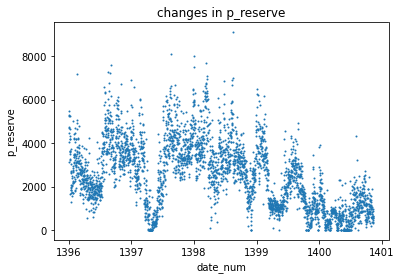

In [180]:
x_axis = list(d['date_num'])

plt.scatter(x_axis, d['p_reserve'], s=1)
plt.title('changes in p_reserve')
plt.xlabel('date_num')
plt.ylabel('p_reserve')
plt.show()

 Conclusion: abnormal fall in p_reserve in the middle of year 1400(due to the growth in electricity consumption in summer)


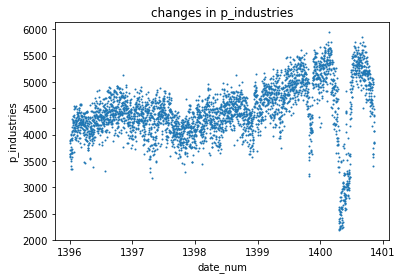

In [181]:
plt.scatter(x_axis, d['p_industries'], s=1)
plt.title('changes in p_industries')
plt.xlabel('date_num')
plt.ylabel('p_industries')
plt.show()

Conclusion: abnormal fall in p_industries in the middle of year 1400(due to the growth in electricity consumption in summer)

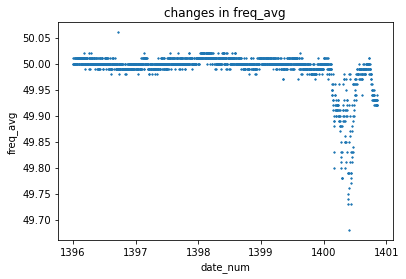

In [182]:
plt.scatter(x_axis, d['freq_avg'], s=1)
plt.title('changes in freq_avg')
plt.xlabel('date_num')
plt.ylabel('freq_avg')
plt.show()

 Conclusion: abnormal fall in freq_avg in the middle of year 1400(due to the growth in electricity consumption in summer)
 
### part 4
 
 plot the line_chart (y_axis = p of day) & (x_axis = day)
 
 plot the line_chart (y_axis = p_renewable of day) & (x_axis = day)

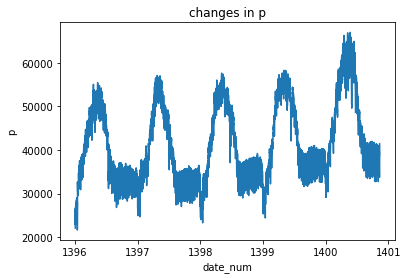

In [183]:
plt.plot(x_axis, d['p'])
plt.title('changes in p')
plt.xlabel('date_num')
plt.ylabel('p')
plt.show()

 Conclusion: according to this figure, electricity consumption rises dramatically around summer, 
 when cooling relies mostly on electricity, while heat in colder conditions relies mostly on gas.
 In conclusion, the said pattern is visible in the data.

 Conclusion: through time, electricity consumption in each season increases respectively,
 as each year has a higher consumption than the last.


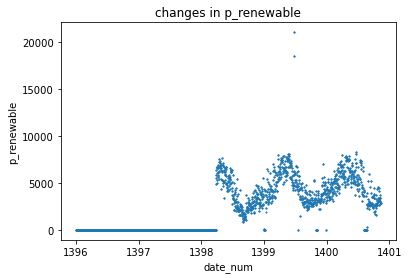

In [184]:
plt.scatter(x_axis, d['p_renewable'], s=1)
plt.title('changes in p_renewable')
plt.xlabel('date_num')
plt.ylabel('p_renewable')
plt.show()

 Conclusion: yes, p_renewable was zero before the second half of year 1398, and had a dramatic rise after that.
 Besides, there are some outlier datapoints in 1399.

# section 4

### part 1
 
 getting rid of non work hours

In [185]:
df = d[(d['my_time'] >= 800) & (d['my_time'] <= 1559)]
df = df.groupby(['my_date'],as_index=False).agg({'p': 'max'})
df = df.rename(columns={'p': 'p_avarage'})

### part 2

 making the dataframe so that it is one 'p' per day and adiing y and m

In [186]:
df['count'] = 1
temp_1_4 = df.groupby(['my_date']).agg({'count': 'count'})
temp_2_4 = temp_1_4[temp_1_4['count'] >= 2]
print(temp_2_4)

Empty DataFrame
Columns: [count]
Index: []


because temp_2_4 is without value , there is no 'p' to be removed

In [187]:
df['y'] = df['my_date'].apply(lambda x: (x // 10000))
df['m'] = df['my_date'].apply(lambda x: (x - (x // 10000) * 10000) // 100)
df['d'] = df.my_date.apply(lambda x: (x - (x // 100) * 100))


### part 3

In [188]:
d_cal = pd.read_excel('C:/Users/lenvovo/Desktop/Sharif/Python Programming/Project/persianCalendar.xlsx')

 ### part 4
    
 merging the dataframes

In [189]:
d_cal['my_date'] = 0
d_cal['my_date'] = d_cal['date_pr'].str.replace('/', '').astype('int64')
df = pd.merge(left=df, right=d_cal, left_on='my_date', right_on='my_date')

### part 5 will be done after part 6, simultaneously with part 7

### part 6

 the first 13 days of the year, and fridays are to be non working days
    
 also the days between holidays, and Thursdays are semiholidays

In [190]:
for i in range(len(df)):
    if (df.loc[i,'m'] == 1) and (df.loc[i,'d'] <= 13):
        df.loc[i,'holiday_inCal'] =1

### part 7

In [191]:
for i in range( len(df) ):
    if df.loc[i,'weekday_en'] == 'Friday':
        df.loc[i,'holiday_inCal'] =1
for i in range(1,len(df)-1):
    if (df.loc[i-1,'holiday_inCal'] == 1) and (df.loc[i+1,'holiday_inCal'] == 1) and (df.loc[i,"holiday_inCal"]!=1):
        df.loc[i,'holiday_inCal'] =0.5
    if df.loc[i,'weekday_en'] == 'Thursday' and df.loc[i,"holiday_inCal"]!=1:
        df.loc[i,'holiday_inCal'] =0.5
df['workingday_inCal']=1-df.holiday_inCal

### part 7 and part 5

 using interpolation method to fill in for workday data when there's a holiday, and holiday data for workdays.
    
 and using them for plotting a figure using plt.plot and plt.scatter

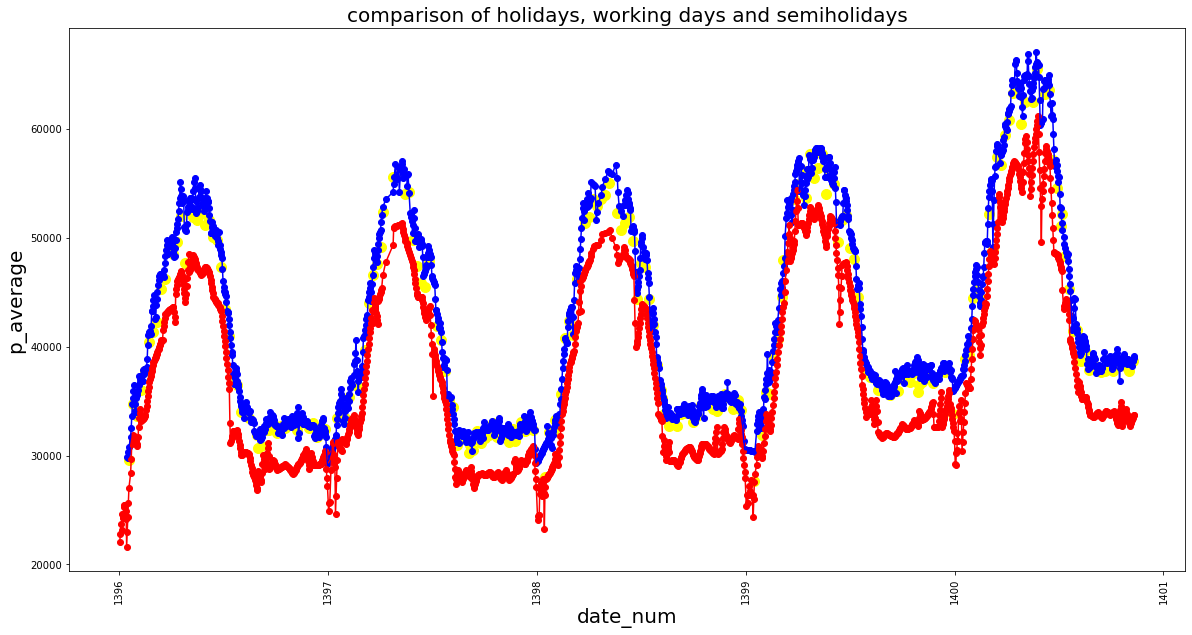

In [192]:
df['y'] = df['my_date'] // 10000
df['m'] = df.my_date.apply(lambda x: (x - (x // 10000) * 10000) // 100)
df['d'] = df.my_date.apply(lambda x: (x - (x // 100) * 100))
for i in range(len(df)):
    if df['m'][i] > 6:
        df.loc[i,'n_days'] = (df.loc[i,'m']-1) * 30 + df.loc[i,'d']+6
    else:
        df.loc[i,'n_days'] = (df.loc[i,'m']-1) * 31 + df.loc[i,'d']
df['date_num'] = df['y'] + df.n_days/366.1
df['graph_working']=0
df['graph_holiday']=0
df['graph_semiholiday']=0
for i in range(len(df)):
    if df.loc[i,'holiday_inCal'] == 1:
        df.loc[i,'graph_holiday'] += df.loc[i,'p_avarage']
        df.loc[i,'graph_working'] = np.nan
        df.loc[i,'graph_semiholiday'] = np.nan
    elif df.loc[i,'holiday_inCal'] == 0:
        df.loc[i,'graph_working'] += df.loc[i,'p_avarage']
        df.loc[i,'graph_holiday'] = np.nan
        df.loc[i,'graph_semiholiday'] = np.nan
    else:
        df.loc[i,'graph_semiholiday'] += df.loc[i,'p_avarage']
        df.loc[i,'graph_holiday'] = np.nan
        df.loc[i,'graph_working'] = np.nan
df['graph_working'] = df['graph_working'].interpolate(method='linear')
df['graph_holiday'] = df['graph_holiday'].interpolate(method='linear')
graph_list_holiday = list(df['graph_holiday'])
graph_list_working = list(df['graph_working'])
graph_list_semiholiday=list(df['graph_semiholiday'])
plt.figure(figsize=(20, 10))
plt.title('comparison of holidays, working days and semiholidays',fontsize=20)
plt.xlabel('date_num',fontsize=20)
plt.ylabel('p_average',fontsize=20)
plt.xticks(rotation=90)
plt.plot( list(df['date_num']), graph_list_working, c='blue')
plt.plot( list(df['date_num']),graph_list_holiday, c='red')
plt.scatter( list(df['date_num']),graph_list_semiholiday , c='yellow',s=100)
plt.scatter( list(df['date_num']), graph_list_working, c='blue')
plt.scatter( list(df['date_num']),graph_list_holiday, c='red')
plt.show()

 the difference in consumption in workdays and holidays is visible in this figure,
    
 as the consumption in workdays is almost always more than holidays.

# section 5

### part 1

In [193]:
df['ym_num'] = df['my_date'] // 100
df_temp = df.groupby(['ym_num', 'holiday_inCal'], as_index=False)['p_avarage'].agg('mean')
holiday_temp = df_temp[np.array(df_temp['holiday_inCal'] == 1)].drop('holiday_inCal', axis=1)
holiday_temp.rename(columns = {'p_avarage': 'p_holiday_interpolated'}, inplace = True)
df = df.merge(holiday_temp, on = ['ym_num'])
df['p_holiday_interpolated'][df['holiday_inCal'] == 1] = df['p_avarage']
working_temp = df_temp[np.array(df_temp['holiday_inCal'] == 0)].drop('holiday_inCal', axis=1)
working_temp.rename(columns = {'p_avarage': 'p_working_interpolated'}, inplace = True)
df = df.merge(working_temp, on = ['ym_num'])
df['p_working_interpolated'][np.array(df['holiday_inCal'] == 0) | np.array(df['holiday_inCal'] == 0.5)] = df['p_avarage']

C:\Users\lenvovo\AppData\Local\Temp/ipykernel_18120/3558421113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_holiday_interpolated'][df['holiday_inCal'] == 1] = df['p_avarage']
C:\Users\lenvovo\AppData\Local\Temp/ipykernel_18120/3558421113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_working_interpolated'][np.array(df['holiday_inCal'] == 0) | np.array(df['holiday_inCal'] == 0.5)] = df['p_avarage']


### part 2

In [194]:
dfm = df.groupby(['ym_num']).agg({'ym_num': 'first', 'p_holiday_interpolated': 'mean', 'p_working_interpolated': 'mean', 'p_avarage': 'mean'})

### part 3

In [195]:
dfm['p_difference'] = dfm['p_working_interpolated'] - dfm['p_avarage']

        ym_num  p_holiday_interpolated  p_working_interpolated     p_avarage  \
ym_num                                                                         
139601  139601            24992.600000            32997.388715  28834.000000   
139602  139602            34563.333333            39456.894009  38493.870968   
139603  139603            41425.500000            47162.733333  45970.833333   
139604  139604            45390.625000            51819.293718  50069.709677   
139605  139605            47360.000000            53371.127630  52564.064516   
139606  139606            43767.666667            49354.590323  48239.774194   
139607  139607            32479.833333            38372.130000  37153.266667   
139608  139608            28755.166667            33178.256667  32272.000000   
139609  139609            29312.500000            32779.940351  32059.766667   
139610  139610            28783.800000            32708.601587  32055.100000   
139611  139611            29483.750000  

### part 4

to have the approximate power usage of companies in mordad 1400

In [196]:
temp_2_5 = dfm[dfm['ym_num'] == 140005]['p_difference']
temp_2_6 = dfm[dfm['ym_num'] == 140005]['p_working_interpolated']
temp_2_7 = dfm[dfm['ym_num'] == 140005]['p_holiday_interpolated']
print('mordad 1400 difference:',temp_2_5.values)
print('mordad 1400 workingday consumption:',temp_2_6.values)
print('mordad 1400 holiday consumption:',temp_2_7.values)

mordad 1400 difference: [2278.77726575]
mordad 1400 workingday consumption: [64377.32565284]
mordad 1400 holiday consumption: [55573.5]


### part 5

In [197]:
plt.figure(figsize=(20,10),dpi=600)
dfm.ym_num=dfm.ym_num.astype(str)
plt.title('Power usage rate of companies',fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Each rate',fontsize=20)
plt.plot(dfm['ym_num'], dfm['p_difference'])
plt.xticks(rotation=90)
plt.show()

### part 6

In [198]:
plt.figure(figsize=(20,10),dpi=600)
plt.title('Power usage rate of companies compared to the total usage of energy',fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Each rate',fontsize=20)
plt.plot(dfm['ym_num'], (dfm['p_avarage'] - dfm['p_difference']) / dfm['p_avarage'], color='blue')
plt.xticks(rotation=90)
plt.show()

 share of offices' consumption is remarkably low through time, not considering small fluctuations.

# section 6
### part 1

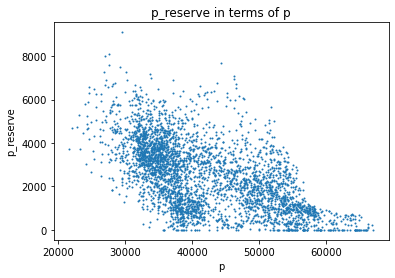

In [199]:
plt.title('p_reserve in terms of p')
plt.xlabel('p')
plt.ylabel('p_reserve')
plt.scatter(d['p'],d['p_reserve'],s=1)
plt.show()

 Conclusion: p_reserve decreases as p increases, so it aligns with the pattern.
 
 ### part 2

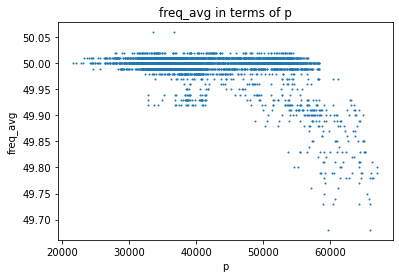

In [200]:
plt.title('freq_avg in terms of p')
plt.xlabel('p')
plt.ylabel('freq_avg')
plt.scatter(d['p'],d['freq_avg'],s=1)
plt.show()

Conclusion: freq_avg decreases as p increases, so it aligns with the pattern.

### part 3

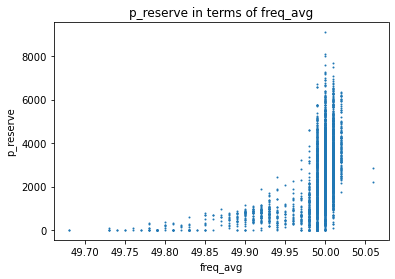

In [201]:
plt.title('p_reserve in terms of freq_avg')
plt.xlabel('freq_avg')
plt.ylabel('p_reserve')
plt.scatter(d['freq_avg'],d['p_reserve'],s=1)
plt.show()

Conclusion: p_reserve increases as freq_avg increases, so it aligns with the pattern

Conclusion: we can use freq_avg and p_reserve in determining widespread off

### part 4

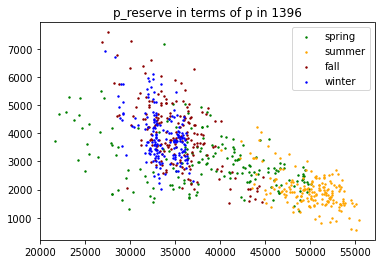

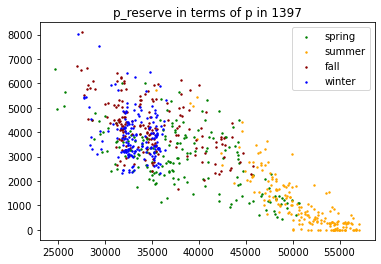

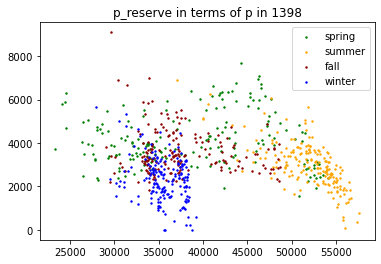

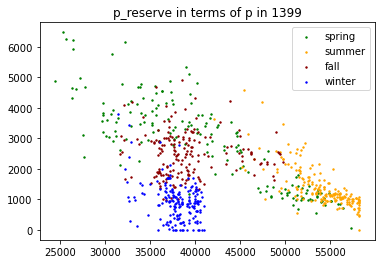

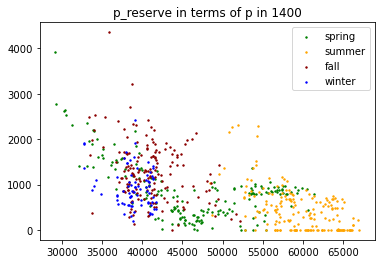

In [202]:
d['s']=d['m']/3
d['s'] = np.ceil(d['s'])

d_spring96 = d[(d['s'] == 1) & (d['y'] == 1396)]
d_summer96 = d[(d['s'] == 2) & (d['y'] == 1396)]
d_fall96 = d[(d['s'] == 3) & (d['y'] == 1396)]
d_winter96 = d[(d['s'] == 4) & (d['y'] == 1396)]

plt.title('p_reserve in terms of p in 1396')
plt.scatter(d_spring96['p'],d_spring96['p_reserve'],c='green',label='spring',s=2)
plt.scatter(d_summer96['p'],d_summer96['p_reserve'],c='orange',label='summer',s=2)
plt.scatter(d_fall96['p'],d_fall96['p_reserve'],c='darkred',label='fall',s=2)
plt.scatter(d_winter96['p'],d_winter96['p_reserve'],c='blue',label='winter',s=2)
plt.legend()
plt.show()


d_spring97 = d[(d['s'] == 1) & (d['y'] == 1397)]
d_summer97 = d[(d['s'] == 2) & (d['y'] == 1397)]
d_fall97 = d[(d['s'] == 3) & (d['y'] == 1397)]
d_winter97 = d[(d['s'] == 4) & (d['y'] == 1397)]

plt.title('p_reserve in terms of p in 1397')
plt.scatter(d_spring97['p'],d_spring97['p_reserve'],c='green',label='spring',s=2)
plt.scatter(d_summer97['p'],d_summer97['p_reserve'],c='orange',label='summer',s=2)
plt.scatter(d_fall97['p'],d_fall97['p_reserve'],c='darkred',label='fall',s=2)
plt.scatter(d_winter97['p'],d_winter97['p_reserve'],c='blue',label='winter',s=2)
plt.legend()
plt.show()

d_spring98 = d[(d['s'] == 1) & (d['y'] == 1398)]
d_summer98 = d[(d['s'] == 2) & (d['y'] == 1398)]
d_fall98 = d[(d['s'] == 3) & (d['y'] == 1398)]
d_winter98 = d[(d['s'] == 4) & (d['y'] == 1398)]

plt.title('p_reserve in terms of p in 1398')
plt.scatter(d_spring98['p'] , d_spring98['p_reserve'],c='green',label='spring',s=2)
plt.scatter(d_summer98['p'],d_summer98['p_reserve'],c='orange',label='summer',s=2)
plt.scatter(d_fall98['p'],d_fall98['p_reserve'],c='darkred',label='fall',s=2)
plt.scatter(d_winter98['p'],d_winter98['p_reserve'],c='blue',label='winter',s=2)
plt.legend()
plt.show()

d_spring99 = d[(d['s'] == 1) & (d['y'] == 1399)]
d_summer99 = d[(d['s'] == 2) & (d['y'] == 1399)]
d_fall99 = d[(d['s'] == 3) & (d['y'] == 1399)]
d_winter99 = d[(d['s'] == 4) & (d['y'] == 1399)]

plt.title('p_reserve in terms of p in 1399')
plt.scatter(d_spring99['p'],d_spring99['p_reserve'],c='green',label='spring',s=2)
plt.scatter(d_summer99['p'],d_summer99['p_reserve'],c='orange',label='summer',s=2)
plt.scatter(d_fall99['p'],d_fall99['p_reserve'],c='darkred',label='fall',s=2)
plt.scatter(d_winter99['p'],d_winter99['p_reserve'],c='blue',label='winter',s=2)
plt.legend()
plt.show()


d_spring00 = d[(d['s'] == 1) & (d['y'] == 1400)]
d_summer00 = d[(d['s'] == 2) & (d['y'] == 1400)]
d_fall00 = d[(d['s'] == 3) & (d['y'] == 1400)]
d_winter00 = d[(d['s'] == 4) & (d['y'] == 1400)]

plt.title('p_reserve in terms of p in 1400')
plt.scatter(d_spring00['p'],d_spring00['p_reserve'],c='green',label='spring',s=2)
plt.scatter(d_summer00['p'],d_summer00['p_reserve'],c='orange',label='summer',s=2)
plt.scatter(d_fall00['p'],d_fall00['p_reserve'],c='darkred',label='fall',s=2)
plt.scatter(d_winter00['p'],d_winter00['p_reserve'],c='blue',label='winter',s=2)
plt.legend()
plt.show()



 q1: 1400 has the least p_reserve in comparison.
 
 q2: mostly summer, and after that, winter.
 
 q3: for all years(and mostly in summer), p_reserve approaches zero, as p goes above 50000.
 
 but in winters of 1398 and 1399, p_reserve approaches zero when p goes above 35000.

### part 5

In [203]:
jj = ( d['p_reserve'] == 0 ) & (d['freq_avg']<49.99)
d['widespread_off'] = jj.astype('int64')

### part 6

In [204]:
dm_widespread_off = d[d['widespread_off']==1]
dm_widespread_off = dm_widespread_off.groupby(['y','m'])['p'].agg(['min','max'])

dm_widespread_off['p_range'] = dm_widespread_off['max'] - dm_widespread_off['min']

### part 7

 At first, we tried to check whether p_holiday_interpolated would fall in the interval between dm_widespread['min'] and dm_widespread['max']

 and use it as a way to determine shutdown's effectiveness.

 But in some months only one widespread off had happened and as a result we couldn't use this method.

 So we turned the peak numbers that caused a widespread off into np.nan

 and estimated that the interpolated number for those peak, equals the maximum peak that wouldn't result in widespread off

 If p_holiday_interpolated is lower than the interpolated maximum peak , then we concluded that shutdown can be effective

In [206]:
d['pm'] = d['p']
d['pm'].loc[ d['widespread_off'] == 1] = np.nan

d['pm'] = d['pm'].interpolate(method='linear')

rr = d[(d['my_time'] >= 800) & (d['my_time'] <= 1559)]
rr = rr.groupby(['my_date'] , as_index=False).agg({'p': 'max','widespread_off':'first','pm':'first'})
rr = rr.rename(columns={'p': 'p_avarage'})
rr = rr[rr['widespread_off'] == 1]

rr = pd.merge(rr , df , on='my_date' , how = 'left' )

rr['Estimation'] = rr['p_holiday_interpolated'] < rr['pm']

dm_widespread_off.reset_index(inplace= True)
z =list((dm_widespread_off[(dm_widespread_off['y']==1400) & (dm_widespread_off['m']==5)][['max','min']].values)[0])

print('widespread_off in mordad 1400 happened for peaks in range %s'%sorted(z))

e1 = rr[(rr['Estimation']==True) & (rr['y']==1400) & (rr['m']==5) ]['my_date']

print('if these working_days in Mordad 1400 change to holiday, there will be no widespread_off on that day:',list(e1))


e2 = rr[rr['Estimation']==True]['my_date']
e2 = list(e2)
print('if these working_days change to holiday, there will be no widespread_off on that day:',e2)

widespread_off in mordad 1400 happened for peaks in range [57119.0, 67012.0]
if these working_days in Mordad 1400 change to holiday, there will be no widespread_off on that day: [14000502, 14000503, 14000516, 14000517, 14000518, 14000519, 14000520, 14000521, 14000523, 14000524, 14000525]
if these working_days change to holiday, there will be no widespread_off on that day: [13970430, 13991022, 13991023, 13991024, 13991025, 14000228, 14000301, 14000408, 14000413, 14000431, 14000502, 14000503, 14000516, 14000517, 14000518, 14000519, 14000520, 14000521, 14000523, 14000524, 14000525, 14000602, 14000603, 14000604, 14000606, 14000607, 14000608, 14000609, 14000610, 14000611, 14000615, 14000617, 14000621, 14000622, 14000623]


# more questions

### part1

we'll compare the number of widespread offs in each month, average of p_reserve and frequency

In [207]:
d_compare=d.groupby(['y','m'])['widespread_off','p_reserve','freq_avg'].agg({'widespread_off':'sum','p_reserve':'mean','freq_avg':'mean'})
d_compare_ws=d_compare.sort_values(by='widespread_off',ascending=False)
g=enumerate(d_compare_ws.index[:10],1)
print('Top ten months with the most critical conditions according to widespread parameter are:')
for i in list(g):
    print(i[0],'. ',i[1][0],'/',i[1][1],sep='')
d_compare_reserve=d_compare.sort_values(by='p_reserve')
print('Top ten months with the most critical conditions according to p_reserve parameter are:')
for i in list(enumerate(d_compare_reserve.index[:10],1)):
    print(i[0],'. ',i[1][0],'/',i[1][1],sep='')
d_compare_freq=d_compare.sort_values(by='freq_avg')
print('Top ten months with the most critical conditions according to freq_avg parameter are:')
for i in list(enumerate(d_compare_freq.index[:10],1)):
    print(i[0],'. ',i[1][0],'/',i[1][1],sep='')

Top ten months with the most critical conditions according to widespread parameter are:
1. 1400/6
2. 1400/5
3. 1399/10
4. 1400/4
5. 1397/4
6. 1400/2
7. 1400/3
8. 1400/8
9. 1399/5
10. 1398/11
Top ten months with the most critical conditions according to p_reserve parameter are:
1. 1400/6
2. 1400/2
3. 1397/4
4. 1400/5
5. 1400/4
6. 1400/11
7. 1397/5
8. 1399/10
9. 1400/3
10. 1399/11
Top ten months with the most critical conditions according to freq_avg parameter are:
1. 1400/5
2. 1400/6
3. 1400/4
4. 1400/3
5. 1400/11
6. 1400/10
7. 1400/2
8. 1400/7
9. 1400/8
10. 1399/10


C:\Users\lenvovo\AppData\Local\Temp/ipykernel_18120/3941591572.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_compare=d.groupby(['y','m'])['widespread_off','p_reserve','freq_avg'].agg({'widespread_off':'sum','p_reserve':'mean','freq_avg':'mean'})


to give a singular answer, we'll give twice as value to widespread off parameter, and get an average of the indexes

In [208]:
d_compare=d_compare.reset_index()
d_compare=d_compare.sort_values(by='widespread_off',ascending=False)
d_compare=d_compare.reset_index()
d_compare['ws_index']=2*(d_compare.index)
d_compare=d_compare.sort_values(by='p_reserve')
d_compare=d_compare.reset_index()
d_compare['reserve_index']=d_compare.index
d_compare=d_compare.drop('level_0',axis=1)
d_compare=d_compare.sort_values(by='freq_avg')
d_compare=d_compare.reset_index()
d_compare['freq_index']=d_compare.index
d_compare['f_sequence']=(d_compare['freq_index']+d_compare['reserve_index']+d_compare['ws_index'])/3
d_compare=d_compare.groupby(['y','m'])['f_sequence'].agg(['first']).sort_values(by='first')
print('Top ten months with the most critical conditions are:')
for i in list(enumerate(d_compare.index[:10],1)):
    print(i[0],'. ',i[1][0],'/',i[1][1],sep='')

Top ten months with the most critical conditions are:
1. 1400/6
2. 1400/5
3. 1400/4
4. 1400/2
5. 1399/10
6. 1397/4
7. 1400/3
8. 1400/8
9. 1399/5
10. 1398/11


### part 2

 observing the share of renewable sources in supplying power through time

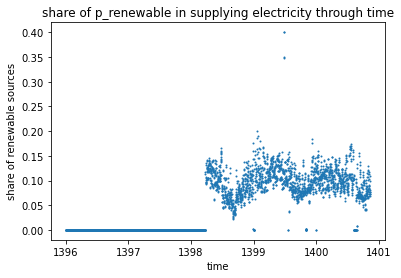

In [209]:
d['share_of_renewable']=d['p_renewable']/d['p']
plt.title('share of p_renewable in supplying electricity through time')
plt.xlabel('time')
plt.ylabel('share of renewable sources')
plt.scatter(d['date_num'],d['share_of_renewable'],s=1)
plt.show()

 According to the figure, share of renewable sources has increased rapidly after 1398, and has been alternating between high and low since then.
    
 This figure is almost the same as the figure in question 3 part 4(changes in p_renewable)

### part 3

In [210]:
d_seasonal_comparison=d[d['y']>1396].groupby(['s','y'])['p','p_lastyear'].mean()
d_seasonal_comparison['growth_percentage']=((d_seasonal_comparison['p']-d_seasonal_comparison['p_lastyear'])/d_seasonal_comparison['p_lastyear'])*100
d_seasonal_comparison.sort_values(by='growth_percentage',ascending=False, inplace=True)
print('Top ten seasons with the highest growth percentage are:')
for i in list(enumerate(d_seasonal_comparison.index[:10],1)):
    print(i[0],'. ',int(i[1][1]),'/',int(i[1][0]),sep='')


Top ten seasons with the highest growth percentage are:
1. 1400/1
2. 1400/2
3. 1398/3
4. 1398/4
5. 1399/4
6. 1400/3
7. 1399/1
8. 1399/2
9. 1399/3
10. 1398/2


C:\Users\lenvovo\AppData\Local\Temp/ipykernel_18120/3493740176.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_seasonal_comparison=d[d['y']>1396].groupby(['s','y'])['p','p_lastyear'].mean()


### part 4

 comparing net consumption growth rate of Iran with neighboring countries and world average, using plt.plot.
    
 source: www.eia.gov

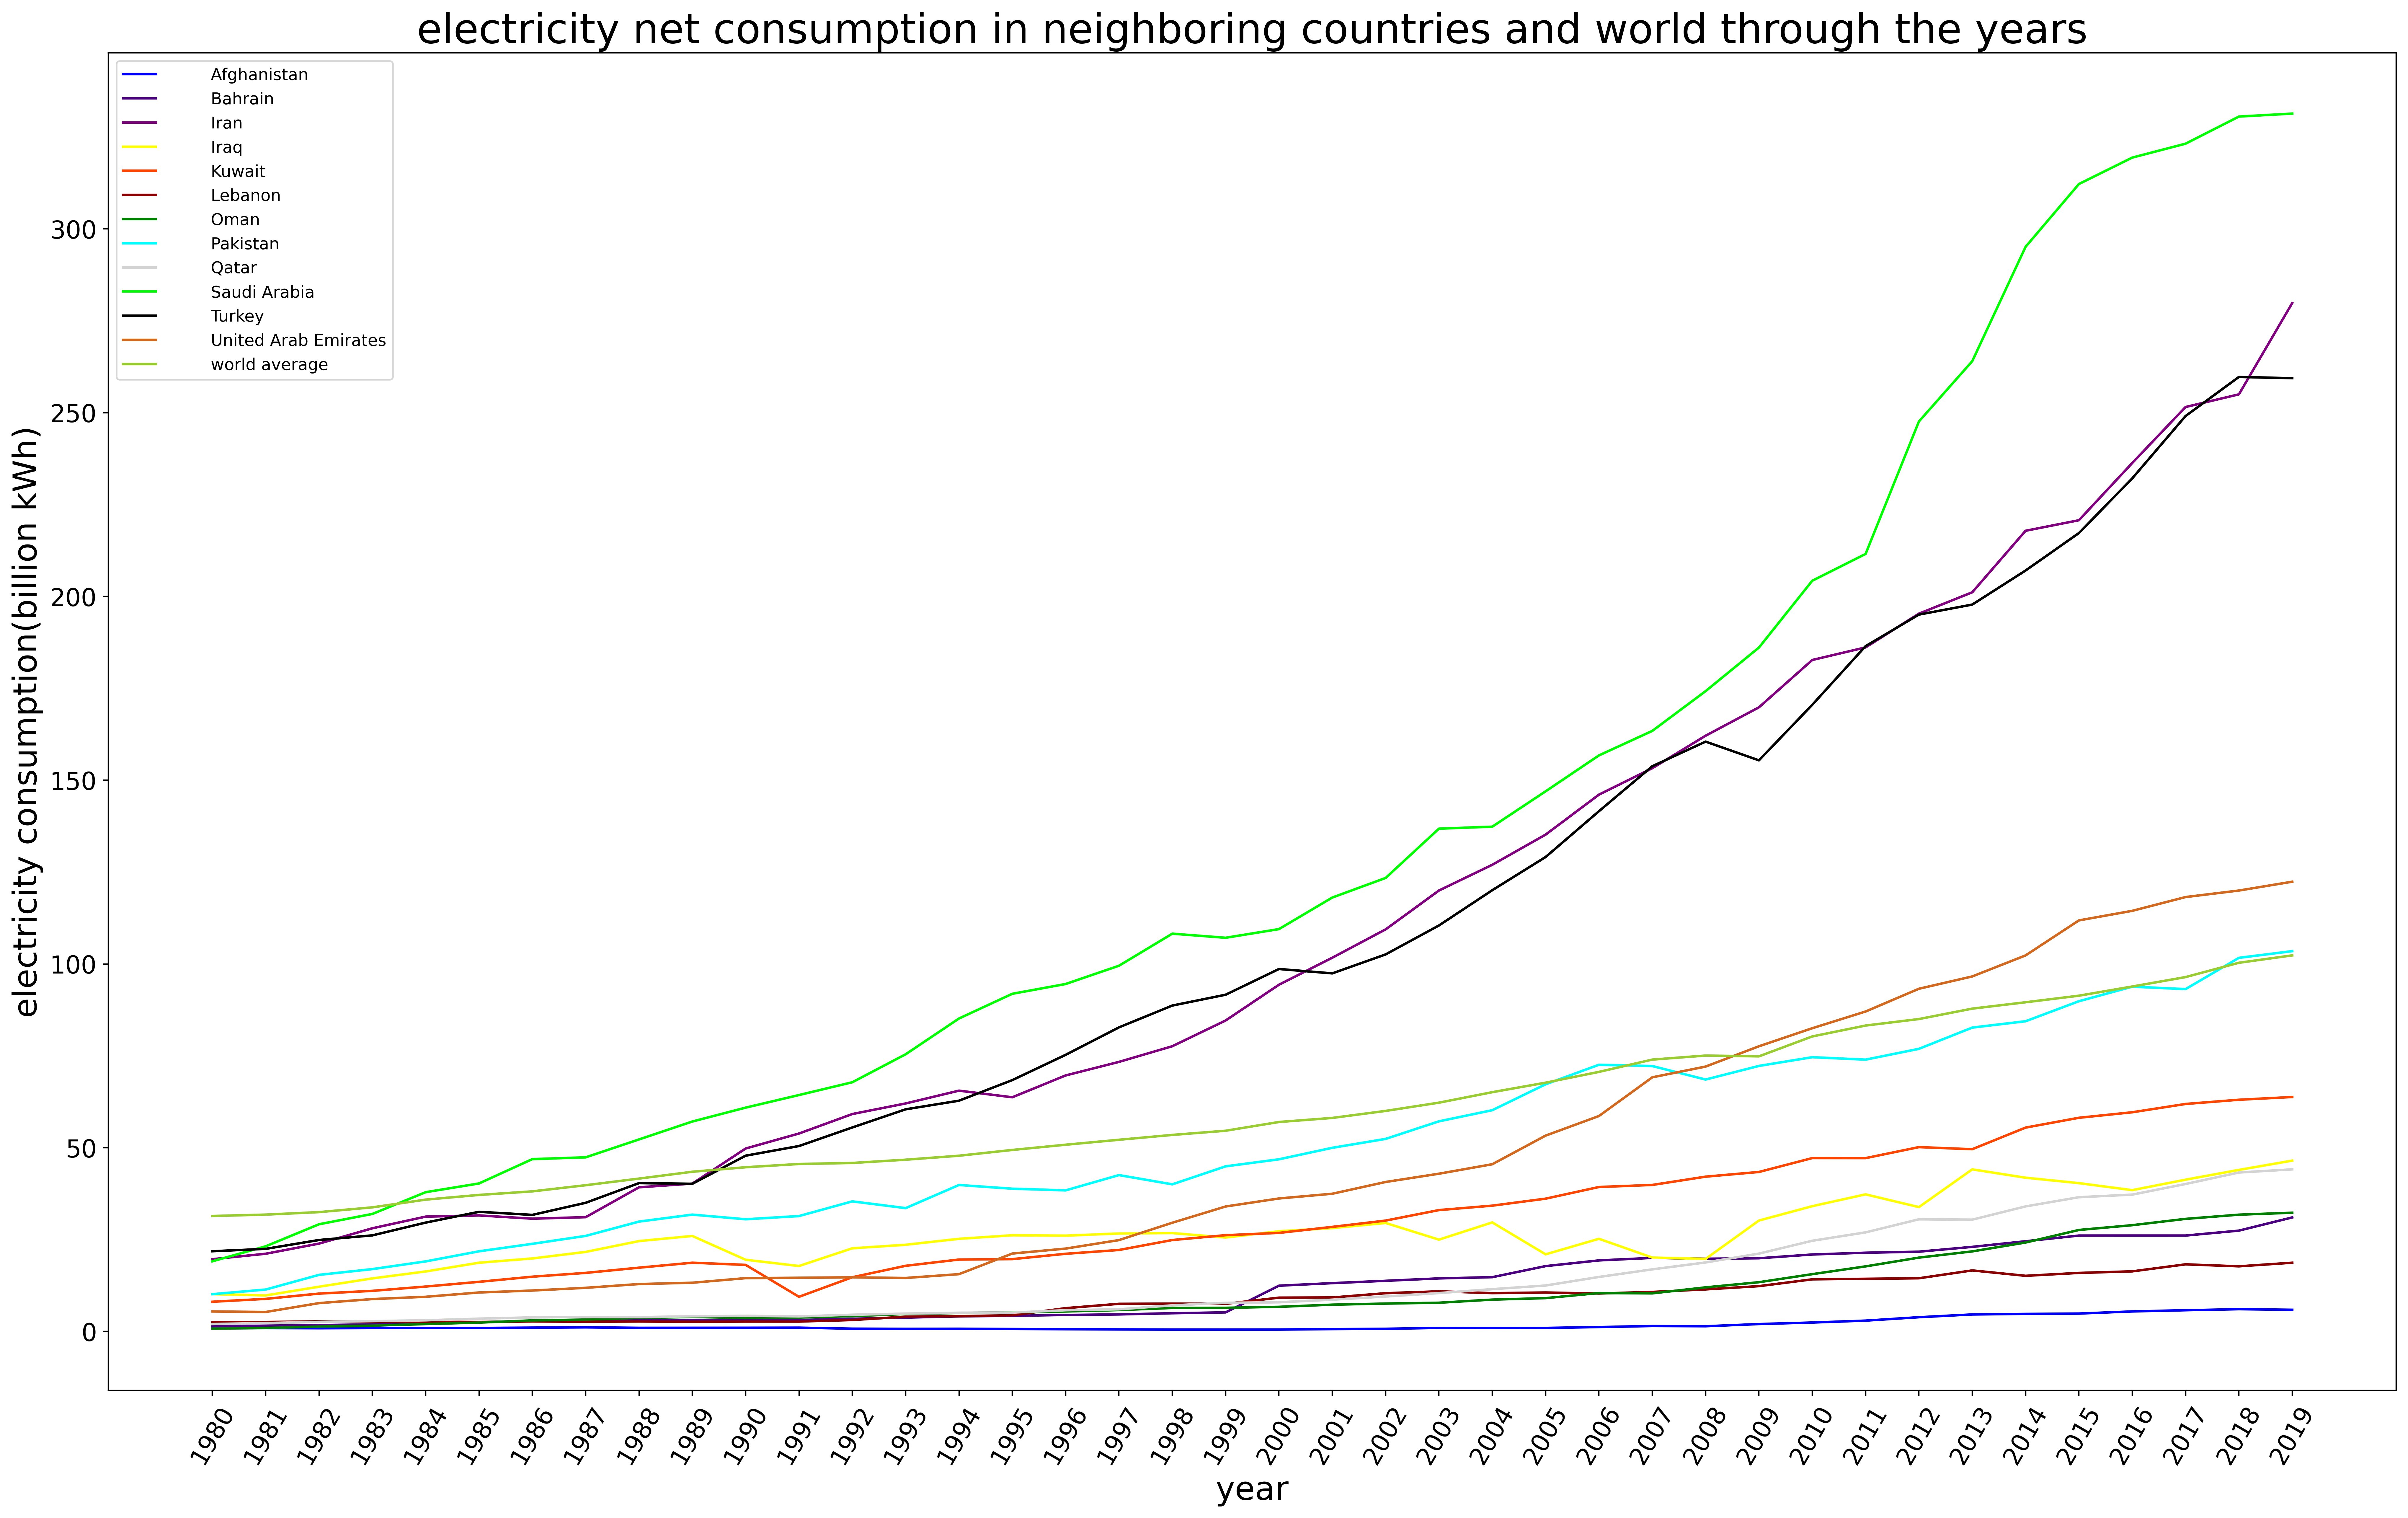

In [211]:
international_d=pd.read_csv(r'C:\Users\lenvovo\Desktop\Sharif\Python Programming\project\q4mq.csv')
international_d.reset_index(inplace=True)
international_d.drop('level_0',axis=1,inplace=True)
columns=['countries']
columns+=[i for i in range(1980,2020)]
international_d.drop(0,axis=0,inplace=True)
international_d.drop(1,axis=0,inplace=True)
international_d.columns=columns

for i in range(1980,2020):
    international_d[i].loc[ international_d[i] == '--'] = np.nan
    international_d[i]=international_d[i].astype('float64')
international_d.dropna(axis=0,inplace=True)
international_d.reset_index(inplace=True)
international_d.drop('index',axis=1,inplace=True)
plt.figure(figsize=(25,15),dpi=400)
plt.title('electricity net consumption in neighboring countries and world through the years',fontsize=25)
plt.xlabel('year',fontsize=20)
plt.ylabel('electricity consumption(billion kWh)',fontsize=20)
aa=0
cc=['blue','indigo','purple','yellow','orangered','darkred','green','cyan','lightgray','lime','black','chocolate','yellowgreen','tomato','gold','mediumpurple','red','pink','magenta','deepskyblue']
v=[1,11,83,84,93,95,127,128,137,148,172,177]
for i in v:
    plt.plot(np.array(list(international_d.columns)[1:],dtype=str),international_d.loc[i].values[1:],label=international_d.loc[i,'countries'],c=cc[aa%19])
    aa+=1
plt.plot(np.array(list(international_d.columns)[1:],dtype=str),(international_d.loc[0].values[1:])/233,label='        world average',c=cc[aa%19])    

plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

 electricity consumption in Iran is higher than most countries in the same region, and the world average.

### part 5

 we'll compare the average of electricity consumption in the last ten years in some countries using barh figure.

In [212]:
plt.figure(figsize=(20,30),dpi=300)
plt.title('average electricity consumption of Iran in comparison with the world',fontsize=70)
plt.xlabel('electricity consumption(billion kWh)',fontsize=50)
plt.ylabel('countries',fontsize=50)
countries1=['        Iran','    World','        United States','        China','        India','        United Kingdom','        Japan','        Vietnam','        Turkey']
international_d['10y_avg']=(international_d[2010]+international_d[2011]+international_d[2012]+international_d[2013]+international_d[2014]+international_d[2015]+international_d[2016]+international_d[2017]+international_d[2018]+international_d[2019])/10
international_d.loc[0,'10y_avg']=international_d.loc[0,'10y_avg']/233
international_d_chosen=international_d[international_d['countries'].isin(countries1)].sort_values(by='10y_avg')
plt.barh(international_d_chosen['countries'],international_d_chosen['10y_avg'])
plt.barh(international_d_chosen['countries'][international_d_chosen['countries']=='        Iran'],international_d_chosen['10y_avg'][international_d_chosen['countries']=='        Iran'])
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

 finding Iran's rank in consumption

In [213]:
international_d.sort_values(by='10y_avg',inplace=True,ascending=False)
international_d.reset_index(inplace=True)
print("Iran's rank in electricity consumption is:",list(international_d[international_d['countries']=='        Iran'].index),' in 188 countries',sep='')

Iran's rank in electricity consumption is:[15] in 188 countries


 Iran has a much lower electricity consumption than most populated and industrial countries,
    
 but has a higher consumption than the world average and some smaller countries.

 Iran's consumption rank is 15 in 188 countries.

### part 6

 comparing domestic consumption by comparing consumption per capita in some countries using barh figure.

 source: www.enerdata.net

In [214]:
domestic=pd.read_excel(r'C:\Users\lenvovo\Desktop\Sharif\Python Programming\project\electricity-domestic-consumption-data.xlsx')
columns2=['countries']
columns2+=[i for i in range(1990,2021)]
columns2+=['n','nn']
domestic.columns=columns2
domestic.drop(0,axis=0,inplace=True)
domestic.drop(1,axis=0,inplace=True)
domestic.drop(3,axis=0,inplace=True)
domestic.drop(4,axis=0,inplace=True)
domestic.drop(5,axis=0,inplace=True)
domestic.drop(6,axis=0,inplace=True)
domestic.drop(7,axis=0,inplace=True)
domestic.drop('n',axis=1,inplace=True)
domestic.drop('nn',axis=1,inplace=True)
domestic.dropna(axis=0,inplace=True)
domestic['e_avg']=np.mean(domestic.loc[:,1990:],axis=1)
domestic.loc[2,'e_avg']=domestic.loc[2,'e_avg']/233
countries2=['Iran','World','United States','China','India','United Kingdom','Japan','Russia','Turkey']
domestic_chosen=domestic[domestic['countries'].isin(countries2)].sort_values(by='e_avg')
plt.figure(figsize=(20,30),dpi=300)
plt.title('average domestic electricity consumption of Iran in comparison with the world',fontsize=70)
plt.xlabel('electricity consumption(Terawatt-hour)',fontsize=50)
plt.ylabel('countries',fontsize=50)
plt.barh(domestic_chosen['countries'],domestic_chosen['e_avg'])
plt.barh(domestic_chosen['countries'][domestic_chosen['countries']=='Iran'],domestic_chosen['e_avg'][domestic_chosen['countries']=='Iran'])
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

finding Iran's rank in domestic consumption

In [215]:
domestic.sort_values(by='e_avg',inplace=True,ascending=False)
domestic.reset_index(inplace=True)
print("Iran's rank in domestic electricity consumption is:",list(domestic[domestic['countries']=='Iran'].index),' in 52 countries.',sep='')

Iran's rank in domestic electricity consumption is:[26] in 52 countries.


 Iran's average domestic electricity consumption is much lower than most populated and industrial countries,
    
 but has a higher consumption than the world average and some smaller countries.

 Iran's rank in domestic electricity consumption is 26 in 52 countries.

# saving dataframes

In [216]:
d.to_csv('d.csv')
d_cal.to_csv('d_cal.csv')
international_d.to_csv('international_d.csv')
domestic.to_csv('domestic.csv')